In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
import itertools
from astropy.stats import sigma_clipped_stats

from joblib import load, dump

In [36]:
plt.rcParams['font.size'] = 16

In [37]:
zps = pd.read_csv('./plots/new_ml_zps_parallel/zps_grouping_table_rfo.csv')
ois = pd.read_csv('./plots/new_ml_ois_parallel/ois_grouping_table_rfo.csv')
sps = pd.read_csv('./plots/new_ml_sps_parallel/sps_grouping_table_rfo.csv')
hot = pd.read_csv('./plots/new_ml_hot_parallel/hot_grouping_table_rfo.csv')

In [38]:
zps['m1_diam'] = 1000*zps['m1_diam']
sps['m1_diam'] = 1000*sps['m1_diam']
hot['m1_diam'] = 1000*hot['m1_diam']
ois['m1_diam'] = 1000*ois['m1_diam']

In [39]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [40]:
cols = big_tab.columns

In [41]:
b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

In [42]:
group_cols = ['m1_diam', 'exp_time', 'new_fwhm']

In [43]:
b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

In [44]:
b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [45]:
fcm_F1 = [col for col in cols if 'cm_F1' in col]

vmax=0.8409666803784451
vmin=0.4538972384968819


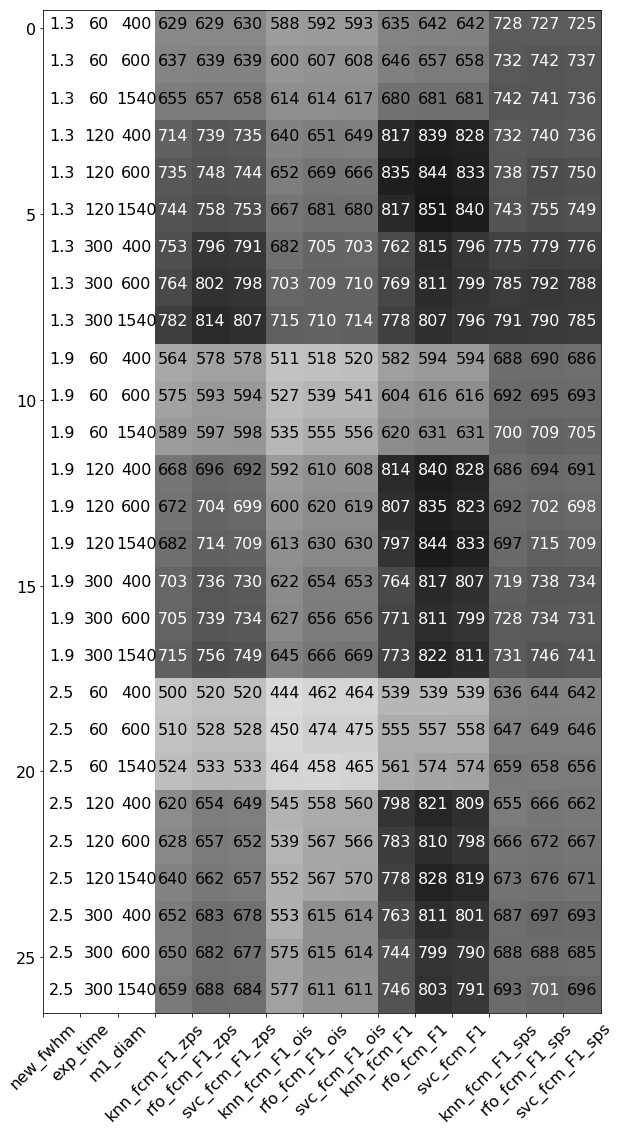

In [49]:
vals = fcm_F1 
plt.figure(figsize=(28, 16))
#orden de las columnas
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
#ordeno por estos valores
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values  # guardo los valores sin modificar

dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2[pl_cols].values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=0.3, #np.min(big_tab[vals].values)+0.01, 
           vmax=0.9, #np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(1000*dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap.svg', format='svg', dpi=780)

In [50]:
diaf_FN_hot = (big_tab['knn_fcm_FN']-big_tab['knn_fcm_10'])
diaf_FN_zps = (big_tab['knn_fcm_FN_zps']-big_tab['knn_fcm_10_zps'])
diaf_FN_sps = (big_tab['knn_fcm_FN_sps']-big_tab['knn_fcm_10_sps'])
diaf_FN_ois = (big_tab['knn_fcm_FN_ois']-big_tab['knn_fcm_10_ois'])

In [51]:
diaf_TP_hot = (big_tab['knn_fcm_11']+big_tab['knn_fcm_10'])
diaf_TP_zps = (big_tab['knn_fcm_11_zps']+big_tab['knn_fcm_10_zps'])
diaf_TP_sps = (big_tab['knn_fcm_11_sps']+big_tab['knn_fcm_10_sps'])
diaf_TP_ois = (big_tab['knn_fcm_11_ois']+big_tab['knn_fcm_10_ois'])

In [52]:
diaf_FP_hot = (big_tab['knn_fcm_00']+big_tab['knn_fcm_01'])
diaf_FP_zps = (big_tab['knn_fcm_00_zps']+big_tab['knn_fcm_01_zps'])
diaf_FP_sps = (big_tab['knn_fcm_00_sps']+big_tab['knn_fcm_01_sps'])
diaf_FP_ois = (big_tab['knn_fcm_00_ois']+big_tab['knn_fcm_01_ois'])

In [53]:
diaf_P_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FP_hot)
diaf_P_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FP_zps)
diaf_P_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FP_sps)
diaf_P_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FP_ois)

In [54]:
diaf_R_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FN_hot)
diaf_R_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FN_zps)
diaf_R_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FN_sps)
diaf_R_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FN_ois)

In [55]:
diaf_F1_hot = 2 * diaf_P_hot * diaf_R_hot /(diaf_P_hot+diaf_R_hot)
diaf_F1_zps = 2 * diaf_P_zps * diaf_R_zps /(diaf_P_zps+diaf_R_zps)
diaf_F1_sps = 2 * diaf_P_sps * diaf_R_sps /(diaf_P_sps+diaf_R_sps)
diaf_F1_ois = 2 * diaf_P_ois * diaf_R_ois /(diaf_P_ois+diaf_R_ois)

In [56]:
print(np.sum(diaf_TP_hot), np.sum(diaf_FN_hot), np.sum(diaf_FP_hot), np.sum(diaf_TP_hot)+np.sum(diaf_FN_hot))
print(np.sum(diaf_TP_zps), np.sum(diaf_FN_zps), np.sum(diaf_FP_zps), np.sum(diaf_TP_zps)+np.sum(diaf_FN_zps))
print(np.sum(diaf_TP_sps), np.sum(diaf_FN_sps), np.sum(diaf_FP_sps), np.sum(diaf_TP_sps)+np.sum(diaf_FN_sps))
print(np.sum(diaf_TP_ois), np.sum(diaf_FN_ois), np.sum(diaf_FP_ois), np.sum(diaf_TP_ois)+np.sum(diaf_FN_ois))

1971291.0 764233.0 5537472.0 2735524.0
1933065.0 1339719.0 3170082.0 3272784.0
2180390.0 1092394.0 2456754.0 3272784.0
1596713.0 1676071.0 1979241.0 3272784.0


In [57]:
pre_F1 = pd.DataFrame(np.array([big_tab['new_fwhm'].values, big_tab['exp_time'].values, big_tab['m1_diam'].values, 
              diaf_F1_zps, diaf_F1_zps, diaf_F1_zps, 
              diaf_F1_ois, diaf_F1_ois, diaf_F1_ois, 
              diaf_F1_hot, diaf_F1_hot, diaf_F1_hot, 
              diaf_F1_sps, diaf_F1_sps, diaf_F1_sps]).T,
            columns=['new_fwhm', 'exp_time', 'm1_diam', 
                     'F1_zps_1', 'F1_zps_2', 'F1_zps_3',
                     'F1_ois_1', 'F1_ois_2', 'F1_ois_3',
                     'F1_hot_1', 'F1_hot_2', 'F1_hot_3',
                     'F1_sps_1', 'F1_sps_2', 'F1_sps_3'])

In [58]:
tt = big_tab[pl_cols]

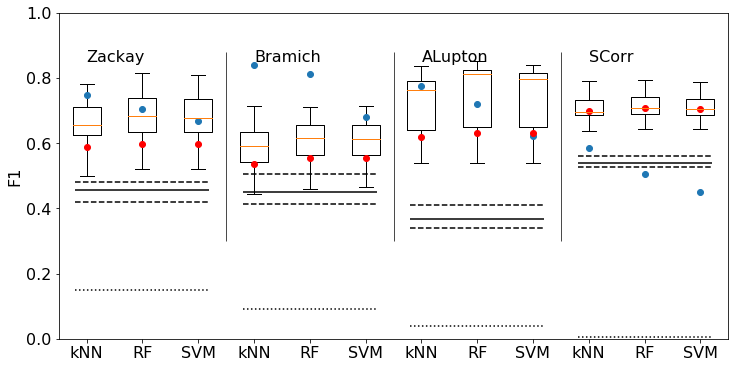

In [59]:
plt.figure(figsize=(12,6))
#plt.title('F1 measure for each technique')
plt.boxplot(big_tab[vals].values)
realdataF1 = [0.746, 0.704, 0.668, 0.840, 0.813, 0.680, 0.775, 0.719, 0.621, 0.585, 0.506, 0.450]
plt.plot(np.arange(12)+1.0, realdataF1, 'o')

ff = (tt['m1_diam']>1500)&(tt['exp_time']>50)&(tt['exp_time']<70)&(tt['new_fwhm']>1.8)&(tt['new_fwhm']<2.0)
eabalike = tt.loc[ff]
plt.plot(np.arange(12)+1.0, eabalike.values.ravel()[-12:], 'ro')


plt.hlines(y=np.median(diaf_F1_zps), xmin=0.8, xmax=3.2)
plt.hlines(y=np.percentile(diaf_F1_zps, q=[25, 75]), xmin=0.8, xmax=3.2, linestyles='--')
#realdata
plt.hlines(y=0.15, xmin=0.8, xmax=3.2, linestyles=':')
plt.vlines(x=3.5, ymin=0.3, ymax=0.88, lw=0.7)


plt.hlines(y=np.median(diaf_F1_ois), xmin=3.8, xmax=6.2)
plt.hlines(y=np.percentile(diaf_F1_ois, q=[25, 75]), xmin=3.8, xmax=6.2, linestyles='--')
#realdata
plt.hlines(y=0.09, xmin=3.8, xmax=6.2, linestyles=':')
plt.vlines(x=6.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_hot), xmin=6.8, xmax=9.2)
plt.hlines(y=np.percentile(diaf_F1_hot, q=[25, 75]), xmin=6.8, xmax=9.2, linestyles='--')
#realdata
plt.hlines(y=0.04, xmin=6.8, xmax=9.2, linestyles=':')
plt.vlines(x=9.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_sps), xmin=9.8, xmax=12.2)
plt.hlines(y=np.percentile(diaf_F1_sps, q=[25, 75]), xmin=9.8, xmax=12.2, linestyles='--')
#realdata
plt.hlines(y=0.007, xmin=9.8, xmax=12.2, linestyles=':')
plt.xticks(np.arange(1, 13), ['kNN', 'RF', 'SVM']*4, rotation=0)

plt.text(s='Zackay', x=1, y=0.85)
plt.text(s='Bramich', x=4, y=0.85)
plt.text(s='ALupton', x=7, y=0.85)
plt.text(s='SCorr', x=10, y=0.85)
plt.ylim(0, 1)
plt.ylabel('F1')
plt.savefig('boxplot_f1.pdf', format='pdf', dpi=780)

In [60]:
big_tab['knn_F1_rate_zps'] = big_tab['knn_fcm_F1_zps']/diaf_F1_zps
big_tab['svc_F1_rate_zps'] = big_tab['svc_fcm_F1_zps']/diaf_F1_zps
big_tab['rfo_F1_rate_zps'] = big_tab['rfo_fcm_F1_zps']/diaf_F1_zps

big_tab['knn_F1_rate_sps'] = big_tab['knn_fcm_F1_sps']/diaf_F1_sps
big_tab['svc_F1_rate_sps'] = big_tab['svc_fcm_F1_sps']/diaf_F1_sps
big_tab['rfo_F1_rate_sps'] = big_tab['rfo_fcm_F1_sps']/diaf_F1_sps

big_tab['knn_F1_rate_hot'] = big_tab['knn_fcm_F1']/diaf_F1_hot
big_tab['svc_F1_rate_hot'] = big_tab['svc_fcm_F1']/diaf_F1_hot
big_tab['rfo_F1_rate_hot'] = big_tab['rfo_fcm_F1']/diaf_F1_hot

big_tab['knn_F1_rate_ois'] = big_tab['knn_fcm_F1_ois']/diaf_F1_ois
big_tab['svc_F1_rate_ois'] = big_tab['svc_fcm_F1_ois']/diaf_F1_ois
big_tab['rfo_F1_rate_ois'] = big_tab['rfo_fcm_F1_ois']/diaf_F1_ois

vmax=2.6546639610231617
vmin=1.1867050299472994


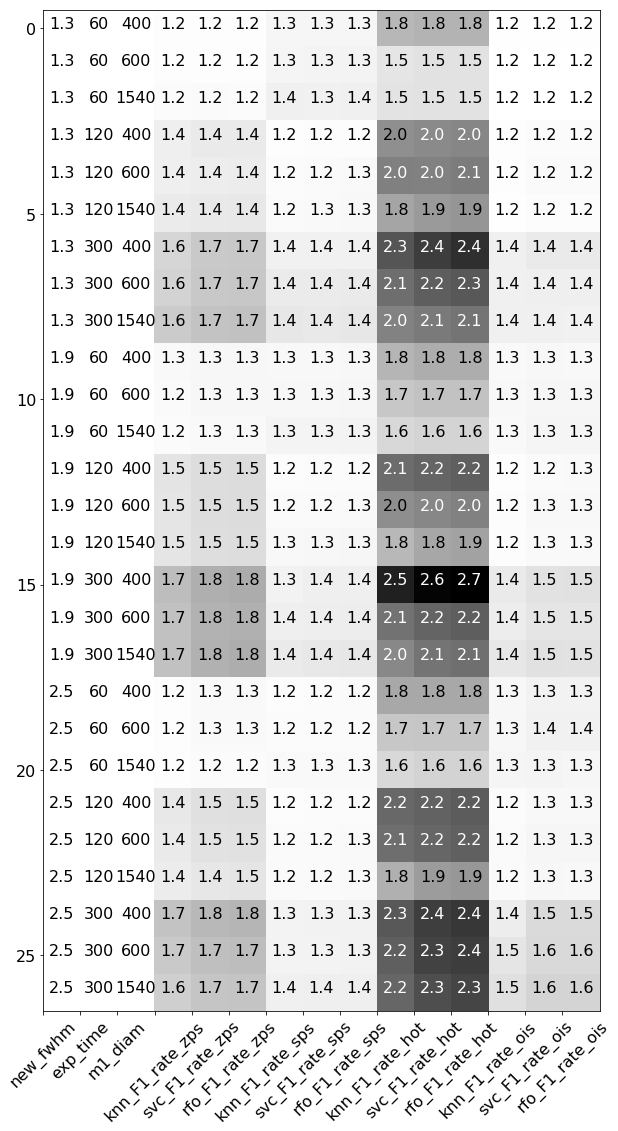

In [61]:
vals = [acol for acol in big_tab.columns if 'F1_rate' in acol] 
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(dat[i, j], '.2'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap_ratio.pdf', format='pdf', dpi=780)

vmax=0.5941705476116197
vmin=0.3043026293041012


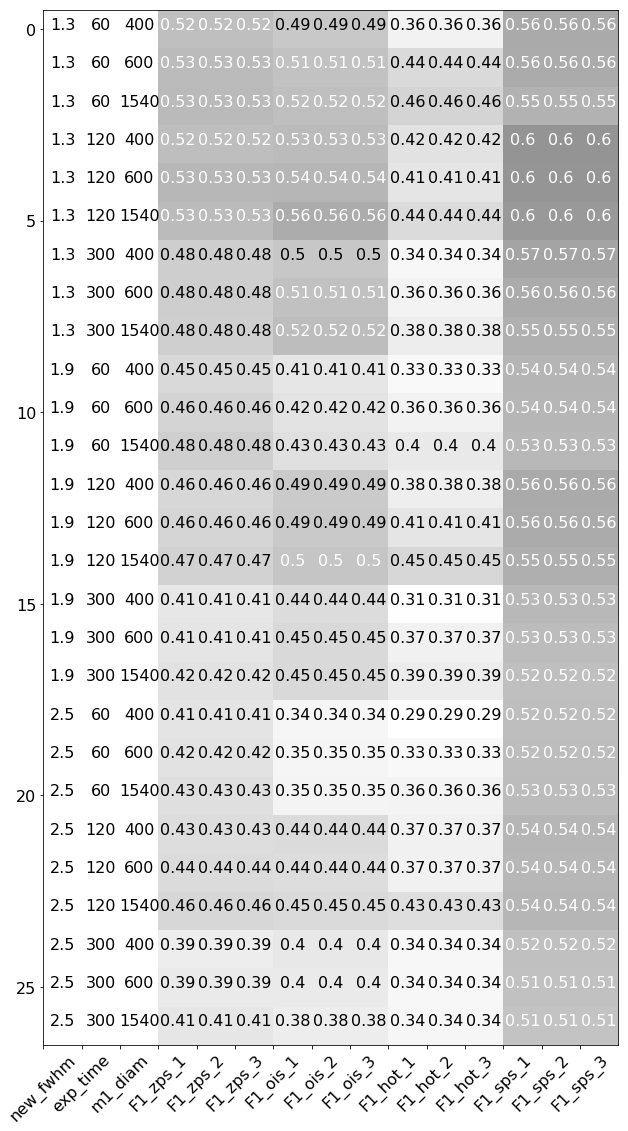

In [64]:
vals = ['F1_zps_1', 'F1_zps_2', 'F1_zps_3', 'F1_ois_1', 'F1_ois_2', 'F1_ois_3',
        'F1_hot_1', 'F1_hot_2', 'F1_hot_3', 'F1_sps_1', 'F1_sps_2', 'F1_sps_3']
big_tab = pre_F1
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=0.3, # np.min(big_tab[vals].values)+0.01, 
           vmax=0.9, #np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(dat[i, j], '.2'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_diaonly.pdf', format='pdf', dpi=780)

## Now without feature selection..

In [24]:
fcm_F1 = [col for col in cols if 'cm0_F1' in col]

In [25]:
fcm_F1

['knn_fcm0_F1_zps',
 'rfo_fcm0_F1_zps',
 'svc_fcm0_F1_zps',
 'knn_fcm0_F1_ois',
 'rfo_fcm0_F1_ois',
 'svc_fcm0_F1_ois',
 'knn_fcm0_F1',
 'rfo_fcm0_F1',
 'svc_fcm0_F1',
 'knn_fcm0_F1_sps',
 'rfo_fcm0_F1_sps',
 'svc_fcm0_F1_sps']

vmax=0.8446845716054265
vmin=0.4642938895372915


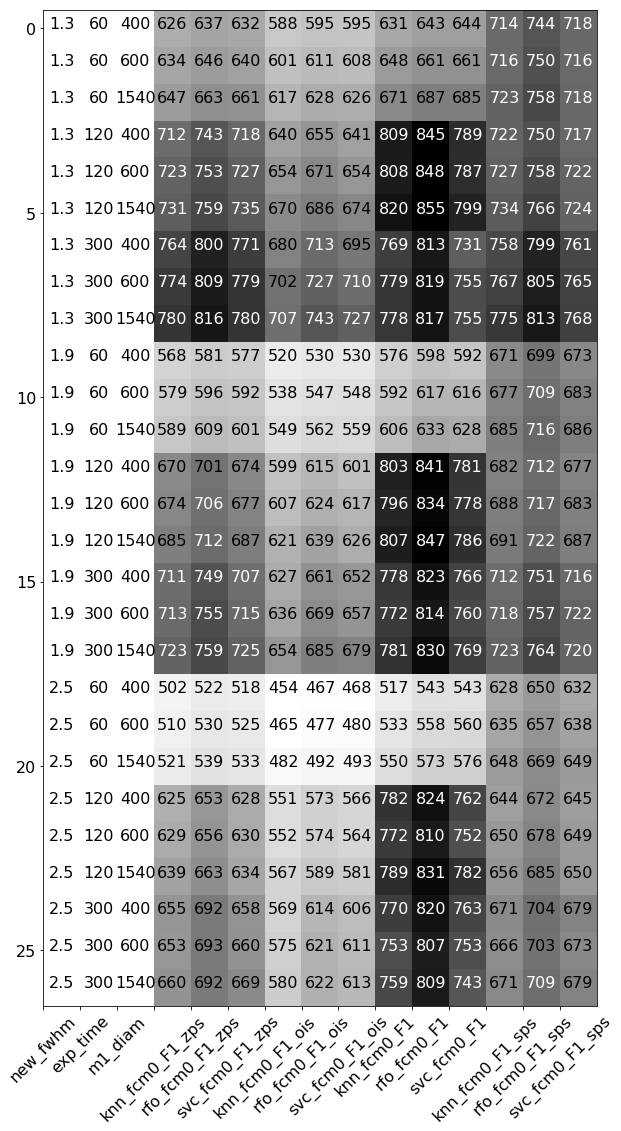

In [26]:
vals = fcm_F1 
plt.figure(figsize=(28, 16))
#orden de las columnas
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
#ordeno por estos valores
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values  # guardo los valores sin modificar

dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2[pl_cols].values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(1000*dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap_0.svg', format='svg', dpi=780)

In [27]:
diaf_FN_hot = (big_tab['knn_fcm0_FN']-big_tab['knn_fcm0_10'])
diaf_FN_zps = (big_tab['knn_fcm0_FN_zps']-big_tab['knn_fcm0_10_zps'])
diaf_FN_sps = (big_tab['knn_fcm0_FN_sps']-big_tab['knn_fcm0_10_sps'])
diaf_FN_ois = (big_tab['knn_fcm0_FN_ois']-big_tab['knn_fcm0_10_ois'])

In [28]:
diaf_TP_hot = (big_tab['knn_fcm0_11']+big_tab['knn_fcm0_10'])
diaf_TP_zps = (big_tab['knn_fcm0_11_zps']+big_tab['knn_fcm0_10_zps'])
diaf_TP_sps = (big_tab['knn_fcm0_11_sps']+big_tab['knn_fcm0_10_sps'])
diaf_TP_ois = (big_tab['knn_fcm0_11_ois']+big_tab['knn_fcm0_10_ois'])

In [29]:
diaf_FP_hot = (big_tab['knn_fcm0_00']+big_tab['knn_fcm0_01'])
diaf_FP_zps = (big_tab['knn_fcm0_00_zps']+big_tab['knn_fcm0_01_zps'])
diaf_FP_sps = (big_tab['knn_fcm0_00_sps']+big_tab['knn_fcm0_01_sps'])
diaf_FP_ois = (big_tab['knn_fcm0_00_ois']+big_tab['knn_fcm0_01_ois'])

In [30]:
diaf_P_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FP_hot)
diaf_P_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FP_zps)
diaf_P_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FP_sps)
diaf_P_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FP_ois)

In [31]:
diaf_R_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FN_hot)
diaf_R_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FN_zps)
diaf_R_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FN_sps)
diaf_R_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FN_ois)

In [32]:
diaf_F1_hot = 2 * diaf_P_hot * diaf_R_hot /(diaf_P_hot+diaf_R_hot)
diaf_F1_zps = 2 * diaf_P_zps * diaf_R_zps /(diaf_P_zps+diaf_R_zps)
diaf_F1_sps = 2 * diaf_P_sps * diaf_R_sps /(diaf_P_sps+diaf_R_sps)
diaf_F1_ois = 2 * diaf_P_ois * diaf_R_ois /(diaf_P_ois+diaf_R_ois)

In [33]:
print(np.sum(diaf_TP_hot), np.sum(diaf_FN_hot), np.sum(diaf_FP_hot), np.sum(diaf_TP_hot)+np.sum(diaf_FN_hot))
print(np.sum(diaf_TP_zps), np.sum(diaf_FN_zps), np.sum(diaf_FP_zps), np.sum(diaf_TP_zps)+np.sum(diaf_FN_zps))
print(np.sum(diaf_TP_sps), np.sum(diaf_FN_sps), np.sum(diaf_FP_sps), np.sum(diaf_TP_sps)+np.sum(diaf_FN_sps))
print(np.sum(diaf_TP_ois), np.sum(diaf_FN_ois), np.sum(diaf_FP_ois), np.sum(diaf_TP_ois)+np.sum(diaf_FN_ois))

1971291.0 764233.0 5537472.0 2735524.0
1933065.0 1339719.0 3170082.0 3272784.0
2180390.0 1092394.0 2456754.0 3272784.0
1596713.0 1676071.0 1979241.0 3272784.0


In [34]:
tt = big_tab[pl_cols]

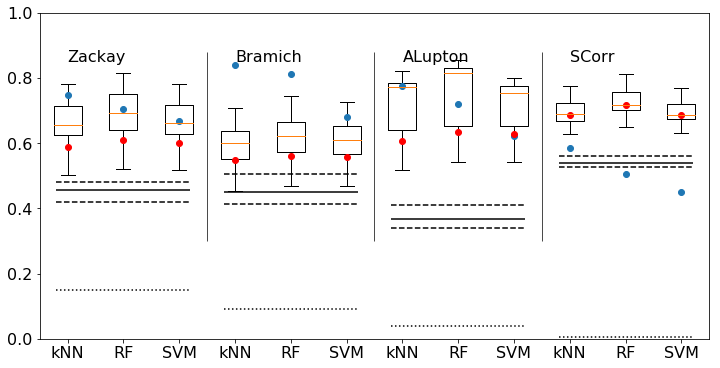

In [35]:
plt.figure(figsize=(12,6))
#plt.title('F1 measure for each technique')
plt.boxplot(big_tab[vals].values)
realdataF1 = [0.746, 0.704, 0.668, 0.840, 0.813, 0.680, 0.775, 0.719, 0.621, 0.585, 0.506, 0.450]
plt.plot(np.arange(12)+1.0, realdataF1, 'o')

ff = (tt['m1_diam']>1500)&(tt['exp_time']>50)&(tt['exp_time']<70)&(tt['new_fwhm']>1.8)&(tt['new_fwhm']<2.0)
eabalike = tt.loc[ff]
plt.plot(np.arange(12)+1.0, eabalike.values.ravel()[-12:], 'ro')

plt.hlines(y=np.median(diaf_F1_zps), xmin=0.8, xmax=3.2)
plt.hlines(y=np.percentile(diaf_F1_zps, q=[25, 75]), xmin=0.8, xmax=3.2, linestyles='--')
#realdata
plt.hlines(y=0.15, xmin=0.8, xmax=3.2, linestyles=':')
plt.vlines(x=3.5, ymin=0.3, ymax=0.88, lw=0.7)


plt.hlines(y=np.median(diaf_F1_ois), xmin=3.8, xmax=6.2)
plt.hlines(y=np.percentile(diaf_F1_ois, q=[25, 75]), xmin=3.8, xmax=6.2, linestyles='--')
#realdata
plt.hlines(y=0.09, xmin=3.8, xmax=6.2, linestyles=':')
plt.vlines(x=6.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_hot), xmin=6.8, xmax=9.2)
plt.hlines(y=np.percentile(diaf_F1_hot, q=[25, 75]), xmin=6.8, xmax=9.2, linestyles='--')
#realdata
plt.hlines(y=0.04, xmin=6.8, xmax=9.2, linestyles=':')
plt.vlines(x=9.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_sps), xmin=9.8, xmax=12.2)
plt.hlines(y=np.percentile(diaf_F1_sps, q=[25, 75]), xmin=9.8, xmax=12.2, linestyles='--')
#realdata
plt.hlines(y=0.007, xmin=9.8, xmax=12.2, linestyles=':')
plt.xticks(np.arange(1, 13), ['kNN', 'RF', 'SVM']*4, rotation=0)

plt.text(s='Zackay', x=1, y=0.85)
plt.text(s='Bramich', x=4, y=0.85)
plt.text(s='ALupton', x=7, y=0.85)
plt.text(s='SCorr', x=10, y=0.85)
plt.ylim(0, 1)
plt.savefig('boxplot_f1_0.pdf', format='pdf', dpi=780)

In [36]:
big_tab['knn_F1_rate_zps'] = big_tab['knn_fcm_F1_zps']/diaf_F1_zps
big_tab['svc_F1_rate_zps'] = big_tab['svc_fcm_F1_zps']/diaf_F1_zps
big_tab['rfo_F1_rate_zps'] = big_tab['rfo_fcm_F1_zps']/diaf_F1_zps

big_tab['knn_F1_rate_sps'] = big_tab['knn_fcm_F1_sps']/diaf_F1_sps
big_tab['svc_F1_rate_sps'] = big_tab['svc_fcm_F1_sps']/diaf_F1_sps
big_tab['rfo_F1_rate_sps'] = big_tab['rfo_fcm_F1_sps']/diaf_F1_sps

big_tab['knn_F1_rate_hot'] = big_tab['knn_fcm_F1']/diaf_F1_hot
big_tab['svc_F1_rate_hot'] = big_tab['svc_fcm_F1']/diaf_F1_hot
big_tab['rfo_F1_rate_hot'] = big_tab['rfo_fcm_F1']/diaf_F1_hot

big_tab['knn_F1_rate_ois'] = big_tab['knn_fcm_F1_ois']/diaf_F1_ois
big_tab['svc_F1_rate_ois'] = big_tab['svc_fcm_F1_ois']/diaf_F1_ois
big_tab['rfo_F1_rate_ois'] = big_tab['rfo_fcm_F1_ois']/diaf_F1_ois

vmax=2.6546639610231617
vmin=1.1867050299472994


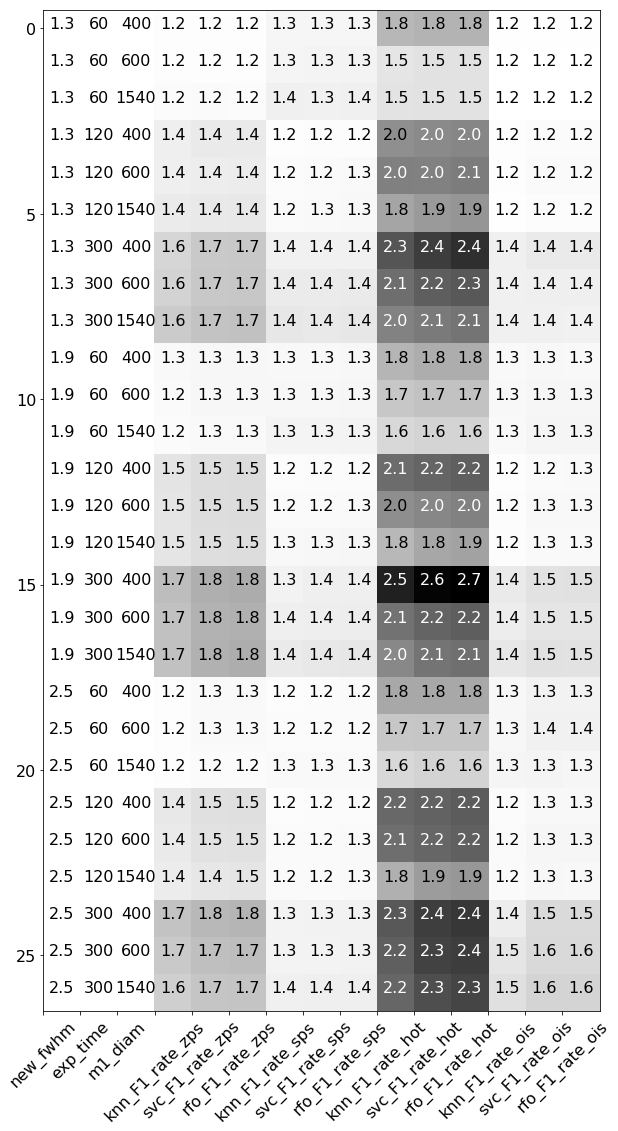

In [37]:
vals = [acol for acol in big_tab.columns if 'F1_rate' in acol] 
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(dat[i, j], '.2'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap_ratio_0.pdf', format='pdf', dpi=780)